In [2]:
import networkx as nx
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

#import problem classes from OQ for easy problem creation
from openqaoa.problems import MaximumCut, NumberPartition

#import the QAOA workflow model
from openqaoa import QAOA

#import method to specify the device
from openqaoa.backends import create_device

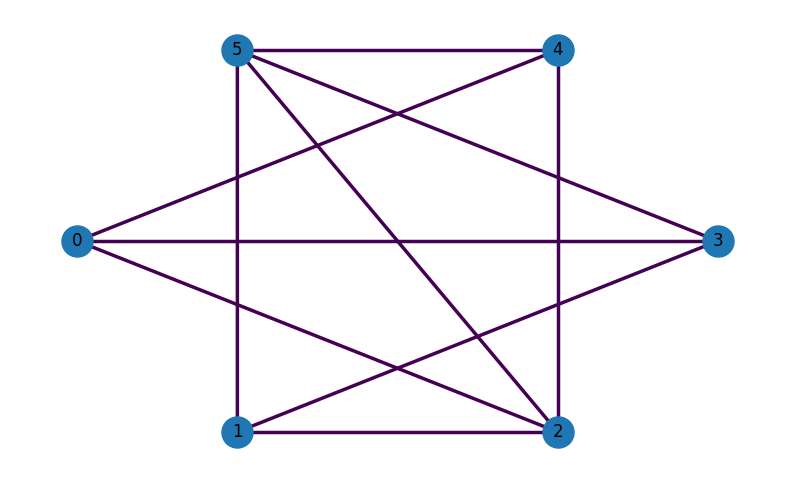

In [3]:
nodes = 6
edge_probability = 0.6
g = nx.generators.fast_gnp_random_graph(n=nodes, p=edge_probability, seed=42)

# import graph plotter from openqaoa
from openqaoa.utilities import plot_graph
plot_graph(g)

In [4]:
# Use the MaximumCut class to instantiate the problem.
maxcut_prob = MaximumCut(g)

# The property `qubo` translates the problem into a binary Qubo problem.
# The binary values can be access via the `asdict()` method.
maxcut_qubo = maxcut_prob.qubo

In [30]:
q = QAOA()

# device
qiskit_device = create_device(location='local', name='qiskit.shot_simulator')
q.set_device(qiskit_device)

# circuit properties
q.set_circuit_properties(p=2, param_type='standard', init_type='rand', mixer_hamiltonian='x')

# backend properties (already set by default)
q.set_backend_properties(prepend_state=None, append_state=None)

# classical optimizer properties
q.set_classical_optimizer(method='nelder-mead', maxiter=200, tol=0.001,
                          optimization_progress=True, cost_progress=True, parameter_log=True)

In [31]:
q.compile(maxcut_qubo)
q.optimize()

In [32]:
r = q.result

In [38]:
import json
import gzip
import shutil


d =r.asdict()
#print(d['intermediate']['cost'])
cost_history = d['intermediate']['cost']
d.pop('intermediate')
d['cost_history'] = cost_history
with open('data.json', 'w') as json_file:
    json.dump(d, json_file)

with open('data.json', 'rb') as f_in:
    with gzip.open('data.json.gz', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
